
---


# **CS 4824/ECE 4424, Homework 3, 100 points, 15% Credit**
##**Due before 11:59 PM Thursday October 31, 2024**
---



**Instructions**:

1.   Honor code is enforced. This is an individual assignment. You should do your own work. Any evidence of copying will result in an immediate zero grade (0 point) and additional penalties/actions.
2.   Edits are only allowed at where 'TODO' tags exist. Edits made elsewhere will result in an immediate zero grade (0 point).
3.   Importing extra packages is forbidden. Any extra package import (including but not limited to numpy, scikit-learn, etc.) will result in an immediate zero grade (0 point).
4.   Please run each cell, including those that are collapsed, shown as `Show code`.
5.   Upon completion of this assignment, please download a '.ipynb' file through Taskbar > File > Download > .ipynb, then upload the file to Canvas.




### **1. Overview and Objective**

In this assignment, you will learn computer vision fundamentals with the famous MNIST data by implementing a handwritten digit recognizer.

More specifically, you need to perform a handwritten digit recognition task using “Kernelized” perceptrons, in which given an image of a handwritten digit you will predict what number it represents. An accurate digit recognizer has important applications in Optical Character Recognition (OCR), which is a backbone for postal mail sorting applications of the United States Postal Services (USPS).

We have simplified the goal to that of a binary classification between two relatively easy-to-distinguish numbers (specifically, predicting a `1` versus a `8`).

As such, this assignment involves end-to-end training and testing of Kernel Perceptron algorithm. You will get hands-on understanding of various kernel functions and how machine learning models operate on a dual space by “Kernelizing” the perceptron.

### **2. Numerical Python Library**
You will be leveraging the powerful Numerical Python library abbreviated as NumPy, which enables efficient operations on arrays with build-in support for linear algebra, Fourier transform, and matrices.

Import NumPy to use it by running `import numpy as np`. In this assignment, we encourage you to use numpy whenever you can.
 Some useful functions you may use include `np.array()`, `np.zeros()`, `np.dot()`, and the `np.linalg` package, among many others. We strongly encourage you to check out the [numpy tutorial](https://numpy.org/doc/stable/user/quickstart.html).

In [3]:
import numpy as np

### **3. Data Loading**

This data file is originally from the MNIST database of handwritten digits, but we have converted the data into an easier-to-use file format.

The data has also undergone some preprocessing. It has been filtered to just those datapoints whose labels are 1 or 8, which have then been relabeled to `1` and `-1`, respectively. Then a training dataset (named `train_1_8.csv`) containing 200 images is created where the first half represents digit 1 and has labels `1`, and the second half represents digit `8` and has labels `-1`.
Similarly, a testing dataset (named `test_1_8.csv`) containing 100 images is created. The first column of these files is the label of each point, followed by the grayscale value of each pixel.

In [4]:
# Data format: each data point is comprised of a list of integers
# between 0 and 255.

def load_data(filename):
    with open(filename) as f:
        header = f.readline()
        labels = []
        points = []
        for line in f.readlines():
            data = line.split(',')
            labels.append(int(data[0]))
            points.append([int(x) for x in data[1:]])
        points = np.array(points)
        labels = np.array(labels)
        return points, labels

from google.colab import drive
drive.mount('/content/drive')

#Append the directory to your python path using sys
import sys
import os
prefix = '/content/drive/My Drive/'
# modify "customized_path_to_your_homework" here to where you uploaded your homework
customized_path_to_your_homework = 'Colab Notebooks/'
sys_path = prefix + customized_path_to_your_homework
sys.path.append(sys_path)
# print(sys.path)

fn_train = os.path.join(sys_path, 'train_1_8.csv')
fn_test = os.path.join(sys_path, 'test_1_8.csv')
print('Path to training data: {}'.format(fn_train))
print('Path to testing data: {}'.format(fn_test))

Mounted at /content/drive
Path to training data: /content/drive/My Drive/Colab Notebooks/train_1_8.csv
Path to testing data: /content/drive/My Drive/Colab Notebooks/test_1_8.csv


In [5]:
train_data, train_labs = load_data(fn_train)
test_data, test_labs = load_data(fn_test)

### **4. Data Visualization**
A powerful way to "know your data" is to visualize it.

A visualization of two data samples is shown below. Each data point has 784 values (converted from an image of shape `28x28`).

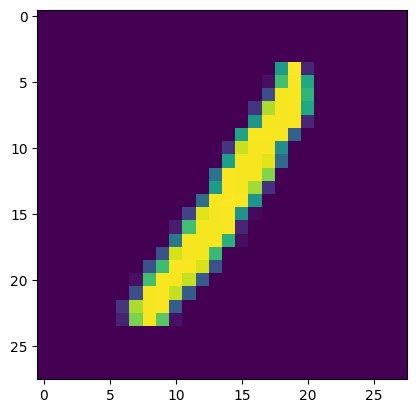

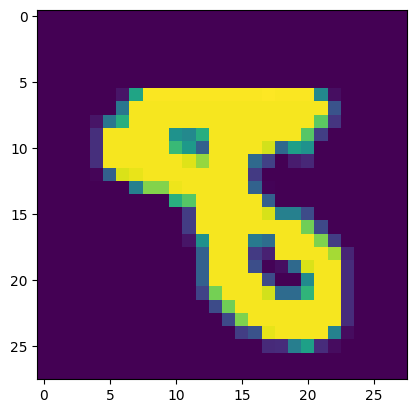

In [6]:
import matplotlib.pyplot as plt

image_1 = train_data[0]
image_8 = train_data[100]

image_1 = image_1.reshape([28, 28])
image_8 = image_8.reshape([28, 28])
plt.imshow(image_1)
plt.show()
plt.imshow(image_8)
plt.show()

### **5. Data Analysis [15 points]**


It's always good to analyze the training dataset. A common statistical  property of an image is the intensity of different greyscale values. Each pixel of images falls into the range of `[0, 255]`, the intensity of greyscale values means the number of pixels having greyscale value as 0, the number of pixels having greyscale value as 1, and so on till value 255.


#### 5.1. Normalized Pixel Intensity Count [5 points]

Fill the following code to use the first `100` images (i.e., images for digit `1`) in the training dataset and obtain a normalized intensity array where each element is the normalized count of pixel having the corresponding values. Notice that the normalization is over `100` images.

In [7]:
def normlized_intensity_count():
    norm_intensity = np.zeros((256,1))
    images_for_1 = train_data[:100]

    # TODO: Fill in here to count the number of pixels corresponding to greyscale values for the 100 images,
    # then normalize the array through dividing it by the total number of pixels.

    for i in range(images_for_1.shape[0]):
      for j in range(images_for_1.shape[1]):
        norm_intensity[images_for_1[i,j]] += 1

    norm_intensity = norm_intensity / (images_for_1.shape[0] * images_for_1.shape[1])

    return norm_intensity

In [8]:
def test_normlized_intensity_count():
    cnt = normlized_intensity_count()
    assert len(cnt) == 256
    assert abs(cnt[0] - 0.8878188775510204) < 1e-4
    assert abs(cnt[-1] - 0.004591836734693878) < 1e-4
test_normlized_intensity_count()
print('Pass: Normalized Intensity Count [5 points]')

Pass: Normalized Intensity Count [5 points]


#### 5.2. Visualizing Intensity [10 points]

A neat way of visualizing the pixel intensities is by utilizing histogram function from [matplotlib](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.hist.html). Check the function on the website and fill in the code below. You may need to modify the `bins` and `intensity` parameters.

We also require you to return the count of each pixel value. A simple way to do this is to use the [np.histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) function and return the first element of the returned result from the function. Notice that you may need to modify the `bins` parameter of the function.

In [27]:
def visualize_intensity():
    images_for_1 = train_data[:100]
    images_for_1_flatten = []
    for i in range(100):
        image = list(images_for_1[i])
        images_for_1_flatten += image
    # TODO: Use `plt.hist()` to visualize the greyscale intensity.

    plt.hist(images_for_1_flatten, bins=256, density=True)
    plt.title('Intensity Histogram')
    plt.xlabel('Intensity')
    plt.ylabel('Proportion')

    plt.show()
    # TODO: Use `np.histogram` to get the count of each pixel value
    list_count, bins = np.histogram(images_for_1_flatten, bins=256)

    return list(list_count)

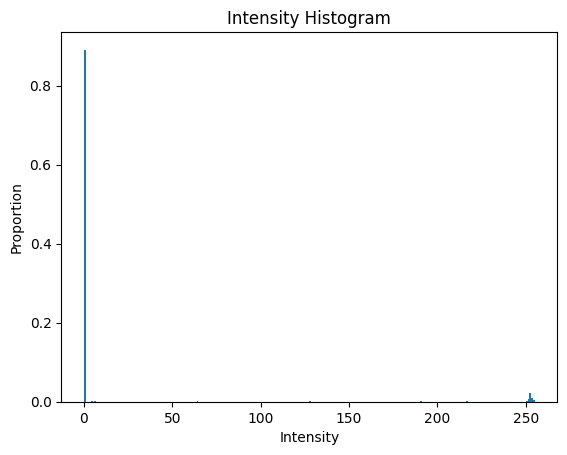

Pass: Visualizing Intensity [10 points]


In [28]:
def test_visualize_intensity():
    s = visualize_intensity()
    assert s == [69605, 17, 19, 26, 45, 25, 47, 30, 31, 30, 29, 35, 39, 29, 27, 25, 28, 25, 17, 32, 34, 28, 23, 28, 24, 26, 25, 22, 10, 23, 13, 19, 29, 18, 17, 40, 18, 21, 21, 21, 18, 17, 21, 17, 21, 20, 10, 18, 22, 10, 25, 33, 9, 22, 14, 26, 15, 24, 19, 25, 13, 17, 16, 21, 48, 7, 11, 8, 34, 19, 16, 21, 17, 40, 13, 11, 21, 10, 26, 10, 11, 17, 13, 4, 21, 29, 34, 12, 18, 11, 14, 16, 20, 28, 14, 17, 20, 22, 18, 11, 6, 3, 13, 7, 12, 8, 22, 14, 17, 42, 23, 16, 14, 11, 21, 16, 25, 13, 16, 10, 17, 16, 16, 15, 11, 12, 14, 18, 80, 14, 8, 12, 10, 12, 15, 18, 15, 11, 27, 8, 13, 10, 23, 16, 25, 17, 23, 18, 22, 30, 20, 40, 16, 15, 17, 7, 26, 9, 17, 15, 23, 18, 8, 13, 11, 13, 10, 12, 14, 9, 32, 17, 15, 22, 18, 18, 20, 18, 13, 17, 17, 29, 19, 31, 24, 19, 7, 14, 12, 11, 21, 59, 20, 19, 18, 26, 23, 18, 15, 15, 14, 17, 30, 24, 11, 19, 14, 40, 19, 13, 25, 18, 20, 11, 16, 23, 24, 53, 26, 23, 21, 22, 22, 17, 14, 12, 26, 21, 21, 15, 34, 30, 18, 35, 23, 27, 21, 20, 17, 26, 31, 38, 37, 29, 33, 25, 25, 20, 26, 30, 28, 232, 627, 1659, 807, 360]
test_visualize_intensity()
print('Pass: Visualizing Intensity [10 points]')

### **6. Evaluation Metric [10 points]**

Before implementing the learning algorithm, it will be helpful to implement the evaluation metric.
In this assignment, we are using the accuracy metric, which is defined as:

$$ accuracy = \frac{\#matching\_labels}{\#labels} $$

In [14]:
def evaluate(labels, preds):
    # Done: fill up the function
    """
    Given labels and predictions, return accuracy

    Args:
        labels: numpy array [num_points], each value is either 1 or -1
        preds: numpy array [num_points], each value is either 1 or -1
    Returns:
        acc: accuracy, the number of matching points divided by total number of points
    """

    acc = np.mean(labels == preds)

    return acc

In [15]:
def test_evaluate():
    labels = np.array([-1, -1, 1, 1, -1])
    preds = np.array([-1, -1, -1, -1, -1])
    acc = evaluate(labels, preds)
    assert acc == .6
test_evaluate()
print('Pass: Evaluation [10 points]')

Pass: Evaluation [10 points]


### **7. Kernel Percetron with Linear Kernel Function [35 points]**


Also referred to as the “Non-kernel”, the linear kernel is the simplest of all the kernels. Technically the data isn’t projected onto higher dimensions when this kernel is used, so it is just the dot product.

First, implement the linear kernel defined as:

$$K(\textbf u,\textbf v) = \textbf u \cdot \textbf v$$

Implement the function `dot_kf`

In [16]:
def dot_kf(u, v):
    """
    The linear kernel returns u*v.

    Args:
        u: a numpy list of numbers
        v: a numpy list of numbers

    Returns:
        dot(u,v)
    """
    # TODO: implement the kernel function
    s = np.dot(u, v)
    return s

Now, implement the Kernel Perceptron algorithm in the dual space with the linear kernel function implemented above.

Train the Kernel Perceptron over the training set using this kernel.

In [17]:
class KerPerceptron(object):

    def __init__(self, kf):
        """
        Args:
            kf - a kernel function that takes in two vectors and returns
            a single number.
        """
        self.kf = kf

    def train(self, points, labels, iters):
        """
        Train the parameters (alpha, b) of the perceptron, given points and labels.

        Args:
            points: numpy array [num_points, num_features], each representing a pixel value
            labels: numpy array [num_points], each value is either 1 or -1
            iters: a value representing number of iterations when updating alpha and b

        Returns:
            alpha: numpy array [num_points]
            b: a value representing bias
        """
        x, y = points, labels
        n, d = x.shape
        self.traindata = x
        self.trainlabs = y
        self.N_train = len(x)
        # TODO: implementa the main function here
        self.alpha = np.zeros((n, 1))
        self.b = 0

        I = 0
        while I < iters:

          for i in range(n):
            s = 0

            for j in range(n):
              s += self.alpha[j] * y[j] * self.kf(x[j,:], x[i,:])
            s += self.b

            if(y[i] * s <= 0):
              self.alpha[i] += 1
              self.b += y[i]

          I += 1

        return self.alpha, self.b

    def predict(self, points, alpha, b):
        """
        Given points, predicts labels of points (1 or -1).

        Args:
            points: numpy array [num_points, num_features], each representing a pixel value
            alpha: numpy array [num_points]
            b: a value representing bias
        Returns:
            prediction_labels: numpy array [num_points], each value is either 1 or -1
        """
        x = self.traindata
        y = self.trainlabs
        test_data = points
        preds = np.zeros(len(test_data))

        # TODO: implementa the main function here

        M = len(test_data)
        n = len(x)

        for i in range(M):
          s = 0

          for j in range(n):
            s += alpha[j] * y[j] * self.kf(x[j,:], test_data[i,:])
          s += b

          if (s > 0):
            preds[i] = 1
          elif (s <= 0):
            preds[i] = -1

        return preds


Below is a template that can be used to initialize and train a Kernel Perceptron algorithm by taking a single pass over the training dataset i.e., `iteration=1`.

Using the trained Kernel Perceptron, we can then make prediction on the testing dataset and evaluate  the prediction accuracy.

In [18]:
kf = dot_kf
p = KerPerceptron(kf)
alpha, b = p.train(train_data, train_labs, iters=1)
test_pred = p.predict(test_data, alpha, b)
evaluate(test_labs, test_pred)

0.64

However, just a single pass over the training dataset may not be sufficient for the Kernel Perceptron learning algorithm. In practice, multiple iterations over
the training dataset are required.

Print out the prediction accuracies for both training and testing datasets by training the Kernel Perceptron over the training dataset for up to 20 iterations, i.e., `iterations=[1, 2, ..., 20]`.

Plot the prediction accuracy over the **testing test** as a function of the number of iterations.

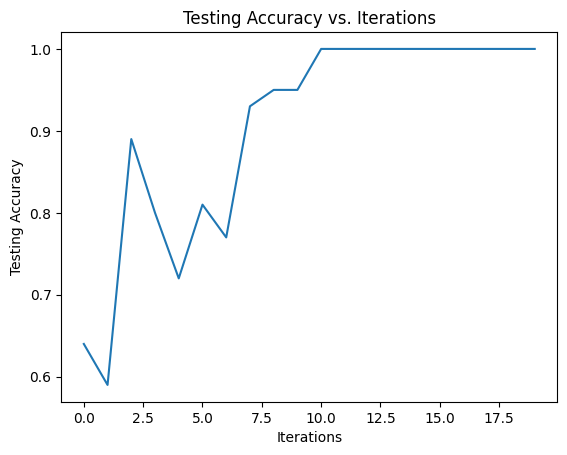

In [33]:
kf = dot_kf
test_accs = []
# TODO: fill up the code below
p = KerPerceptron(kf)

for i in range(20):
  iterations = i + 1
  alpha, b = p.train(train_data, train_labs, iters=iterations)
  test_pred = p.predict(test_data, alpha, b)
  test_accs.append(evaluate(test_labs, test_pred))

plt.plot(test_accs)
plt.title('Testing Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Testing Accuracy')
plt.show()

### **8. Kernel Percetron with Polynomial Kernel [25 points]**

Polynomial kernel projects the data to higher dimensions and are commonly used in kernelized models as the kernel function that represents the similarity of vectors in a feature space over polynomials of the original variables defined by the degree of polynomials up to `d`, allowing learning of non-linear models.

Next, implement polynomial kernel of degree up to `d` defined as:

$$K(\textbf u,\textbf v) = {(\textbf u \cdot \textbf v + 1)}^d$$

Implement the function `poly_kernel`

In [21]:
def poly_kernel(d):
    """
    The polynomial kernel.

    Args:
        d: a number

    Returns:
        A function that takes two vectors u and v,
        and returns (u*v+1)^d.
    """
    def kf(u, v):
        # TODO: implement the kernel function
        s = (np.dot(u, v) + 1)**d
        return s
    return kf

Now, implement the Kernel Perceptron algorithm in the dual space with the polynomial kernel function of degree up to `d` implemented above.

For the set `d = [1,2,3,5,7,10,15,20]`, train a Kernel Perceptron algorithm for `10` iterations over training set with `poly_kernel(d)`.
For each `d`, plot the prediction accuracy over the testing set as a function of iterations.

Report the value of `d` that produces the highest training accuracy.

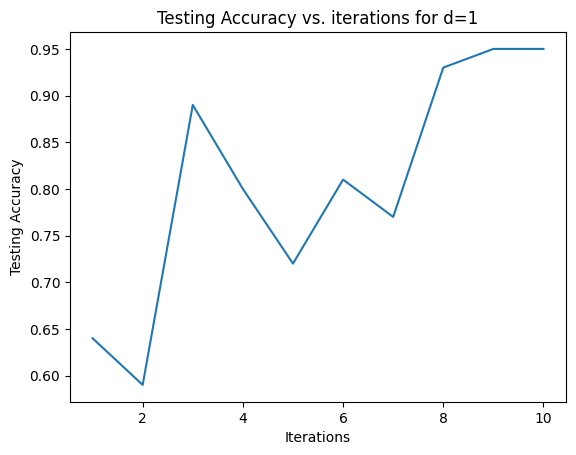

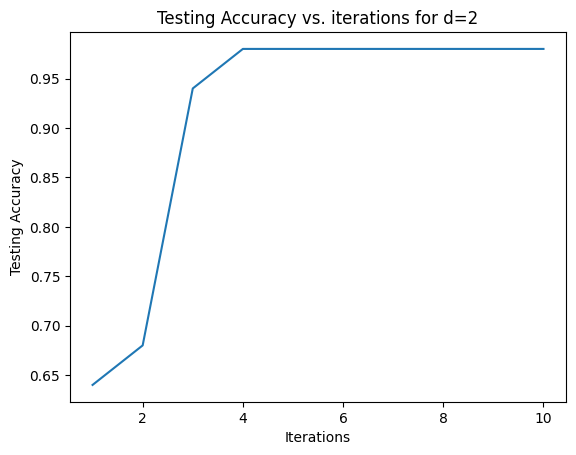

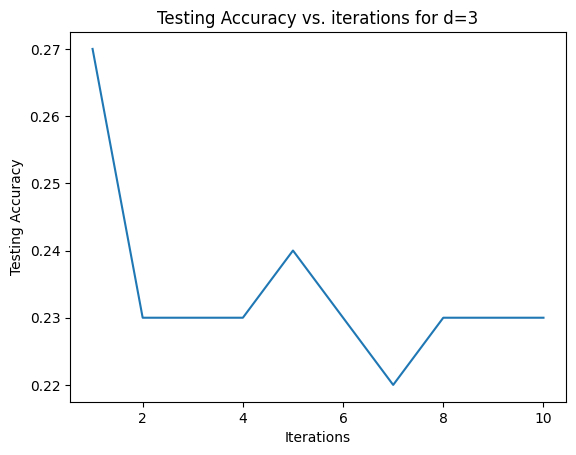

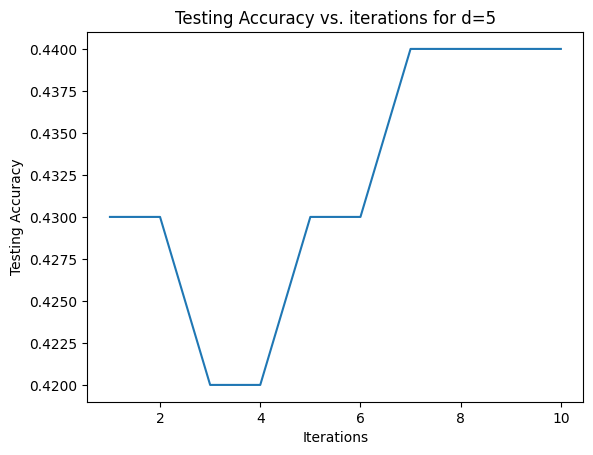

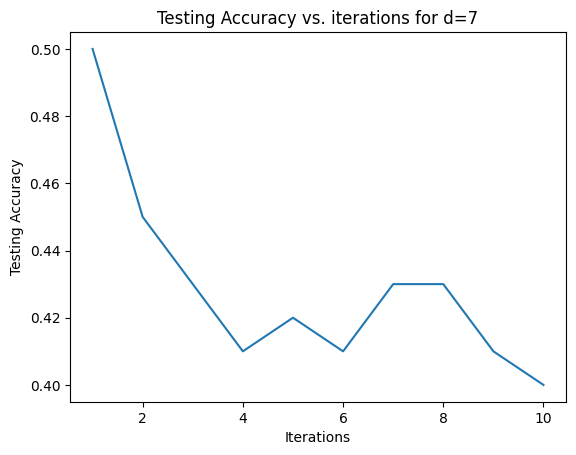

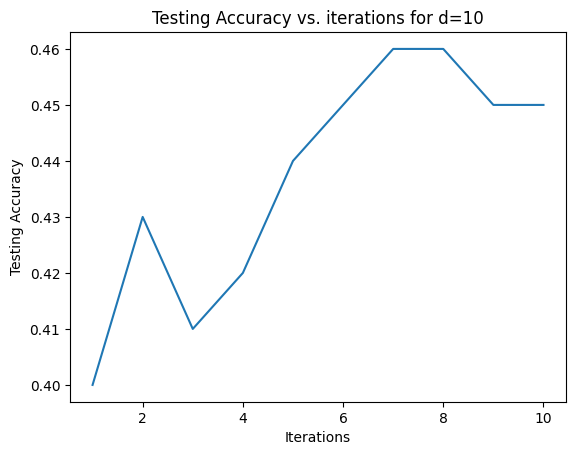

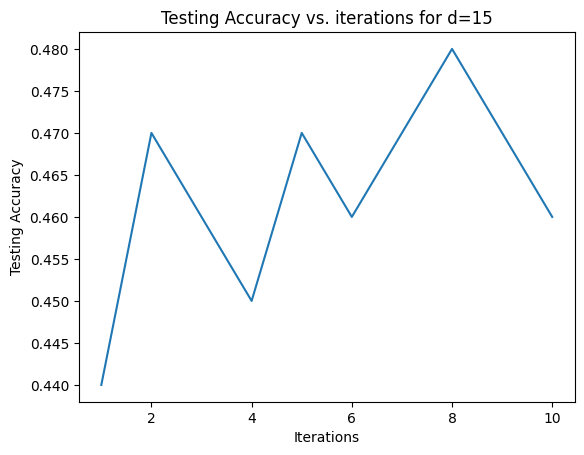

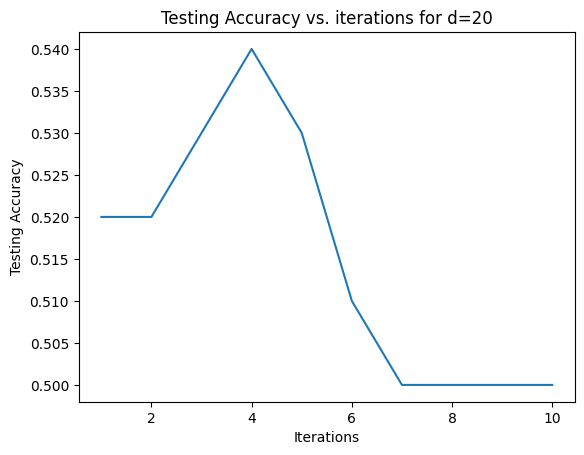

2

In [81]:
def best_d_for_polykf():
    # TODO: fill up the function to return the best d in set [1, 2, 3, 5, 7, 10, 15, 20]
    # that provides the highest training accuracy after 10 iterations,
    # and also plot the required figure.

    test_accs = []
    test_acc = 0
    prev_test_acc = 0
    # TODO: fill up the code below

    D = [1, 2, 3, 5, 7, 10, 15, 20]
    iterations = list(range(1,11))
    #print(iterations)

    cur_best_d = 0
    N_iter_for_best_acc = 0
    prev_N_iter_for_best_acc = 1000

    best_acc = 0
    prev_best_acc = 0

    for d in D:
      for i in iterations:
        kf = poly_kernel(d)
        p = KerPerceptron(kf)
        alpha, b = p.train(train_data, train_labs, iters=i)
        test_pred = p.predict(test_data, alpha, b)
        test_acc = evaluate(test_labs, test_pred)
        test_accs.append(test_acc)

        #print("new sim")
        #print(prev_N_iter_for_best_acc)
        #print(N_iter_for_best_acc)
        #print()

        if test_acc > prev_test_acc and test_acc > prev_best_acc:
          #print(test_acc)
          #print(prev_test_acc)
          #print(test_acc > prev_test_acc)

          N_iter_for_best_acc = i
          #print(f"better test_acc, and N_iter_for_best_acc={N_iter_for_best_acc}")

          if N_iter_for_best_acc < prev_N_iter_for_best_acc:
            best_acc = test_acc
            cur_best_d = d
            #print(f"better N_iter_for_best_acc and prev_N_iter_for_best_acc={prev_N_iter_for_best_acc} and best_acc={best_acc}")

        prev_test_acc = test_acc

        #print(cur_best_d)
        #print(N_iter_for_best_acc)
        #print()

      if (best_acc > prev_best_acc):
        prev_best_acc = best_acc
        prev_N_iter_for_best_acc = N_iter_for_best_acc

      plt.plot(iterations, test_accs)
      plt.title(f'Testing Accuracy vs. iterations for d={d}')
      plt.xlabel('Iterations')
      plt.ylabel('Testing Accuracy')
      plt.show()

      #print(test_accs[-2] > test_accs[-1])
      #print()

      test_accs = []

    return cur_best_d

best_d_for_polykf()

### **9. Kernel Percetron with Gaussian kernel [15 points]**

Gaussian kernel is another commonly used kernel function whose value depends on the distance between points. Gaussian kernel can potentially project the data to an infinite dimensional space, allowing learning of highly complex models.

Next, implement the Gaussian kernel defined as:

$$K(\textbf u,\textbf v) = exp \left( - \frac {||\textbf u - \textbf v ||^2}{2 σ^2}\right)$$


Implement the function `gauss_kernel`



In [82]:
def gauss_kernel(s):
    """
    The Gaussain kernel.

    Args:
        s: a number

    Returns:
        A function that takes two vectors u and v,
        and returns exp(-||u-v||^2/(2*s^2))
    """
    def kf(u, v):
        # TODO: implement the kernel function
        exp = np.exp(-np.linalg.norm(u - v)**2 / (2 * s**2))
        return exp
    return kf

Now, implement the Kernel Perceptron algorithm in the dual space with the Gaussian kernel function implemented above.

For the `d` you chose in the previous step, train two Kernel Perceptrons using `poly_kernel(d)` and `gauss_kernel(1000)`.

Print out the prediction accuracies for both training and testing datasets by independently training the two Kernel Perceptron algoritms over the training dataset for the first 10 iterations, and then plot the prediction accuracies for both perceptrons over the testing set as a function of iterations in the same figure.

Polynomial kernel testing accuracies: [0.64, 0.68, 0.94, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98]
Gaussian kernel testing accuracies: [0.5, 0.52, 0.52, 0.57, 0.72, 0.83, 0.78, 0.9, 0.91, 0.93]


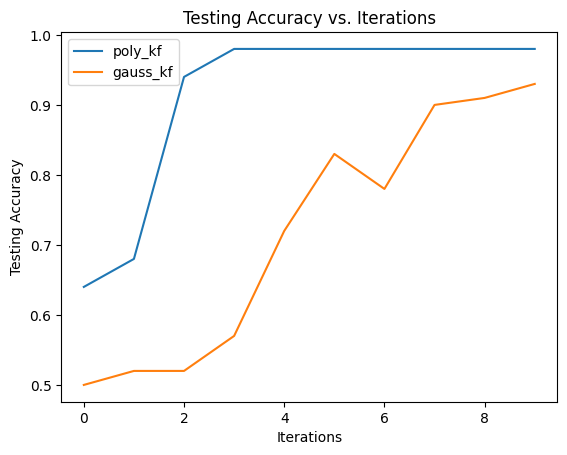

In [83]:
d = 2 # TODO: update the value of d with what you chose in the previous step
test_accs_poly = []
kf = poly_kernel(d)
# TODO: fill up the code below
p = KerPerceptron(kf)

for i in range(10):
  iterations = i + 1
  alpha, b = p.train(train_data, train_labs, iters=iterations)
  test_pred = p.predict(test_data, alpha, b)
  test_accs_poly.append(evaluate(test_labs, test_pred))

kf = gauss_kernel(s=1000)
test_accs = []
# TODO: fill up the code below
p = KerPerceptron(kf)

for i in range(10):
  iterations = i + 1
  alpha, b = p.train(train_data, train_labs, iters=iterations)
  test_pred = p.predict(test_data, alpha, b)
  test_accs.append(evaluate(test_labs, test_pred))

print(f'Polynomial kernel testing accuracies: {test_accs_poly}')
print(f'Gaussian kernel testing accuracies: {test_accs}')

#TODO: plot the required figure
plt.plot(test_accs_poly, label='poly_kf')
plt.plot(test_accs, label='gauss_kf')
plt.title('Testing Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.show()


### **10. Acknowledgments**###

The data file is adapted from the Kaggle competition on Digit Recognizer available <a href=" https://www.kaggle.com/c/digit-recognizer/data">here</a>. We performed data preprocessing, filtering, and format conversion.